<a href="https://colab.research.google.com/github/trong-khanh-1109/CS231.M13.KHCL/blob/main/Harris_Corner_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='center'><b>Harris Corner Detector in OpenCV<b></h1>

Reference: [Harris Corner Detector in OpenCV](https://docs.opencv.org/master/dc/d0d/tutorial_py_features_harris.html)

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [11]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

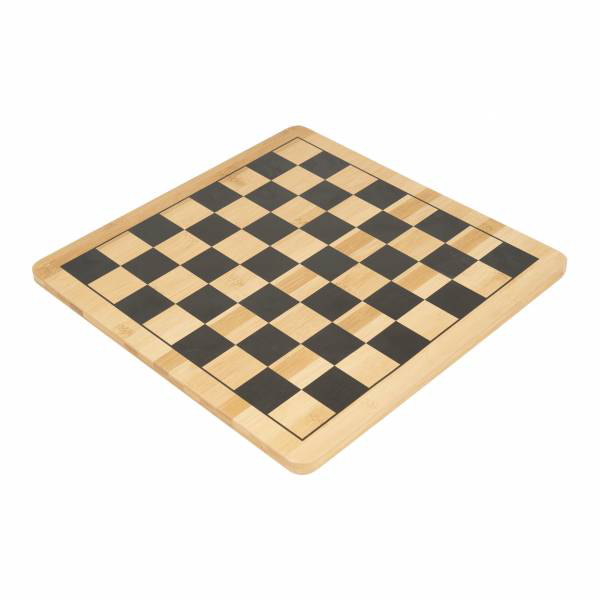

In [9]:
filename = '/content/gdrive/MyDrive/Colab_Notebooks/Computer_Vision/Tuan02_21124661_NguyenKhaMinh/Lab/Week_2/ChessBoard.png'
img = cv2.imread(filename)
cv2_imshow(img)

- **img - Input image**. It should be grayscale and float32 type.
- **blockSize** - It is the size of neighbourhood considered for corner detection
- **ksize** - Aperture parameter of the Sobel derivative used.
- **k** - Harris detector free parameter in the equation.

In [13]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #Chuyển ảnh về ảnh thang xám

# Chuyển đổi hình ảnh thành các giá trị floating-point vì phương pháp cornerHarris sẽ nhận loại giá trị này.
# Chứ không phải là giá trị trực tiếp khi cv2.cvtColor.
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04) #c v2.cornerHarris(img_gray_float32, blockSize, ksize, k)

- Sử dụng thư viện có sẵn trong openCV cornerHarris để tìm ra ma trận độ sáng
tương ứng với mỗi pixel tuân theo công thức **R = det(M) - k(trace(M))$^2$**

  *  Nếu |R| nhỏ, điều này xảy ra khi $\lambda_{1}$ và $\lambda_{2}$ đều nhỏ ==> Vùng mặt phẳng
  *  Nếu R < 0, điều này xảy ra khi $\lambda_{1}$ lớn hơn rất nhiều so với $\lambda_{2}$ hoặc ngược lại ==> Vùng cạnh do chỉ thay đổi cường độ theo 1 chiều
  *  Nếu R lớn,  điều này xảy ra khi $\lambda_{1}$ và $\lambda_{2}$ đều lớn và $\lambda_{1}$ ~ $\lambda_{2}$ ==> Vùng góc do theo hướng nào thì cường độ cũng thay đổi.

In [14]:
# dilate để giãn các đỉnh tìm được ra để đánh dấu các góc(Không quan trọng).
dst = cv2.dilate(dst,None)

In [15]:
# Với mỗi giá trị pixel lớn hơn giá trị lớn nhất nhân với hệ số threshold (Ở đây là 0.01) ta sẽ đánh dấu bằng pixel màu đỏ.
img[dst>0.01*dst.max()]=[0,0,255]

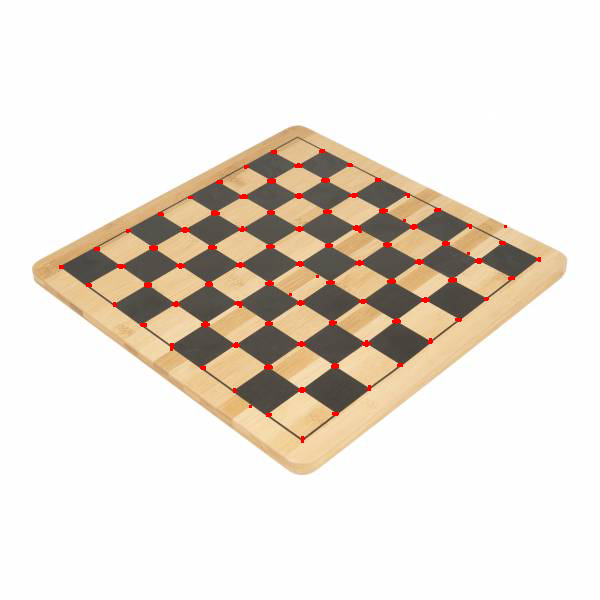

In [16]:
cv2_imshow(img)

<h1 align='center'><b>Corner with SubPixel Accuracy<b></h1>

In [17]:
filename = '/content/gdrive/MyDrive/Colab_Notebooks/Computer_Vision/Tuan02_21124661_NguyenKhaMinh/Lab/Week_2/ChessBoard.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [18]:
# Tìm Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)

# Áp dụng nhị phân ảnh threshold
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)

# Ép kiểu dst về dạng unsigned int
dst = np.uint8(dst)

In [19]:
# Tìm các centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

In [20]:
# Xác định các tiêu chí khi nào dừng lặp.
# Dừng lặp sau một số lần lặp được chỉ định hoặc đạt được độ chính xác nhất định
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

In [21]:
# Now draw them
res = np.hstack((centroids,corners)) # Nối 2 array theo trục x
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]

<ipython-input-21-8e4680b46fd9>:3: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  res = np.int0(res)


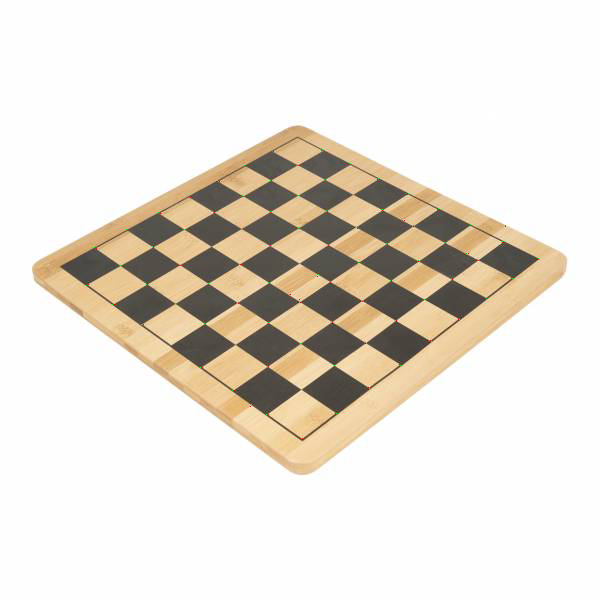

In [22]:
cv2_imshow(img)